# Latar belakang:
Dataset Crime in Boston berisi informasi tentang kejahatan yang terjadi di kota Boston, Massachusetts, Amerika Serikat. Data ini dikumpulkan oleh departemen kepolisian Boston dan mencakup rentang waktu dari tahun 2015 hingga 2018. Dataset ini dapat digunakan untuk melakukan analisis kejahatan dan pemodelan prediksi kejahatan.

# Pernyataan Masalah:
Tujuan dari analisis data ini adalah untuk mengetahui jenis kejahatan apa yang paling sering terjadi di Boston, kapan kejahatan paling sering terjadi dalam sehari dan seminggu, serta pola kejahatan yang terjadi di wilayah Boston.

Dengan menganalisis data ini, kita dapat membantu kepolisian dan otoritas terkait untuk memahami pola kejahatan di kota Boston dan mengambil tindakan preventif yang tepat. Selain itu, kita juga dapat mengevaluasi efektivitas upaya pencegahan dan penanganan kejahatan di kota Boston.

# 1. Import Dataset

Pertama-tama, kita akan mengimpor dataset dengan menggunakan library pandas dan memuatnya ke dalam dataframe.

In [79]:
import pandas as pd

# Load data
df = pd.read_csv('crime.csv', encoding='latin-1')

# Show the first 5 rows of data
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


# 2. Data Understanding

Setelah memuat dataset ke dalam dataframe, langkah selanjutnya adalah memahami struktur dan isi dari dataset.

In [65]:
df.shape

(327820, 17)

In [48]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

# 3. Data Cleaning
Setelah melakukan data understanding, selanjutnya kita akan melakukan data cleaning untuk membersihkan data dari nilai yang hilang atau tidak valid.

In [73]:
# cek jumlah missing value pada setiap kolom
print(df.isnull().sum())

INCIDENT_NUMBER        0     
OFFENSE_CODE           0     
OFFENSE_CODE_GROUP     0     
OFFENSE_DESCRIPTION    0     
DISTRICT               1774  
REPORTING_AREA         0     
SHOOTING               326765
OCCURRED_ON_DATE       0     
YEAR                   0     
MONTH                  0     
DAY_OF_WEEK            0     
HOUR                   0     
UCR_PART               93    
STREET                 10977 
Lat                    20632 
Long                   20632 
Location               0     
dtype: int64


In [90]:
# drop kolom yang tidak dibutuhkan
df.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'REPORTING_AREA', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'], axis=1, inplace=True)

# drop baris yang memiliki missing value
df.dropna(inplace=True)

# cek kembali jumlah missing value pada setiap kolom
df.isnull().sum()

OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
dtype: int64

# 4. Data Preprocessing
Setelah melakukan data cleaning, selanjutnya kita akan melakukan data preprocessing untuk menyiapkan data sebelum dilakukan analisis

In [81]:
# Convert OCCURRED_ON_DATE to datetime
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'], format='%Y-%m-%d %H:%M:%S')

# Show the preprocessed data
df.head()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1052,I182078893,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part One,WASHINGTON ST,42.281647,-71.071118,"(42.28164735, -71.07111848)"
1053,I182078893,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part Two,WASHINGTON ST,42.281647,-71.071118,"(42.28164735, -71.07111848)"
1074,I182078872,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,330,Y,2018-09-29 19:21:00,2018,9,Saturday,19,Part One,SEAVER ST,42.304554,-71.082954,"(42.30455372, -71.08295366)"
1907,I182077958,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part One,MORTON ST,42.283746,-71.089382,"(42.28374593, -71.08938232)"
1908,I182077958,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part Two,MORTON ST,42.283746,-71.089382,"(42.28374593, -71.08938232)"


# 5. Data Analysis
Setelah melakukan data cleaning dan preprocessing, selanjutnya kita akan melakukan analisis data untuk memahami karakteristik laporan kejahatan yang terjadi di Boston dan mengidentifikasi pola dan tren kejahatan di Boston.

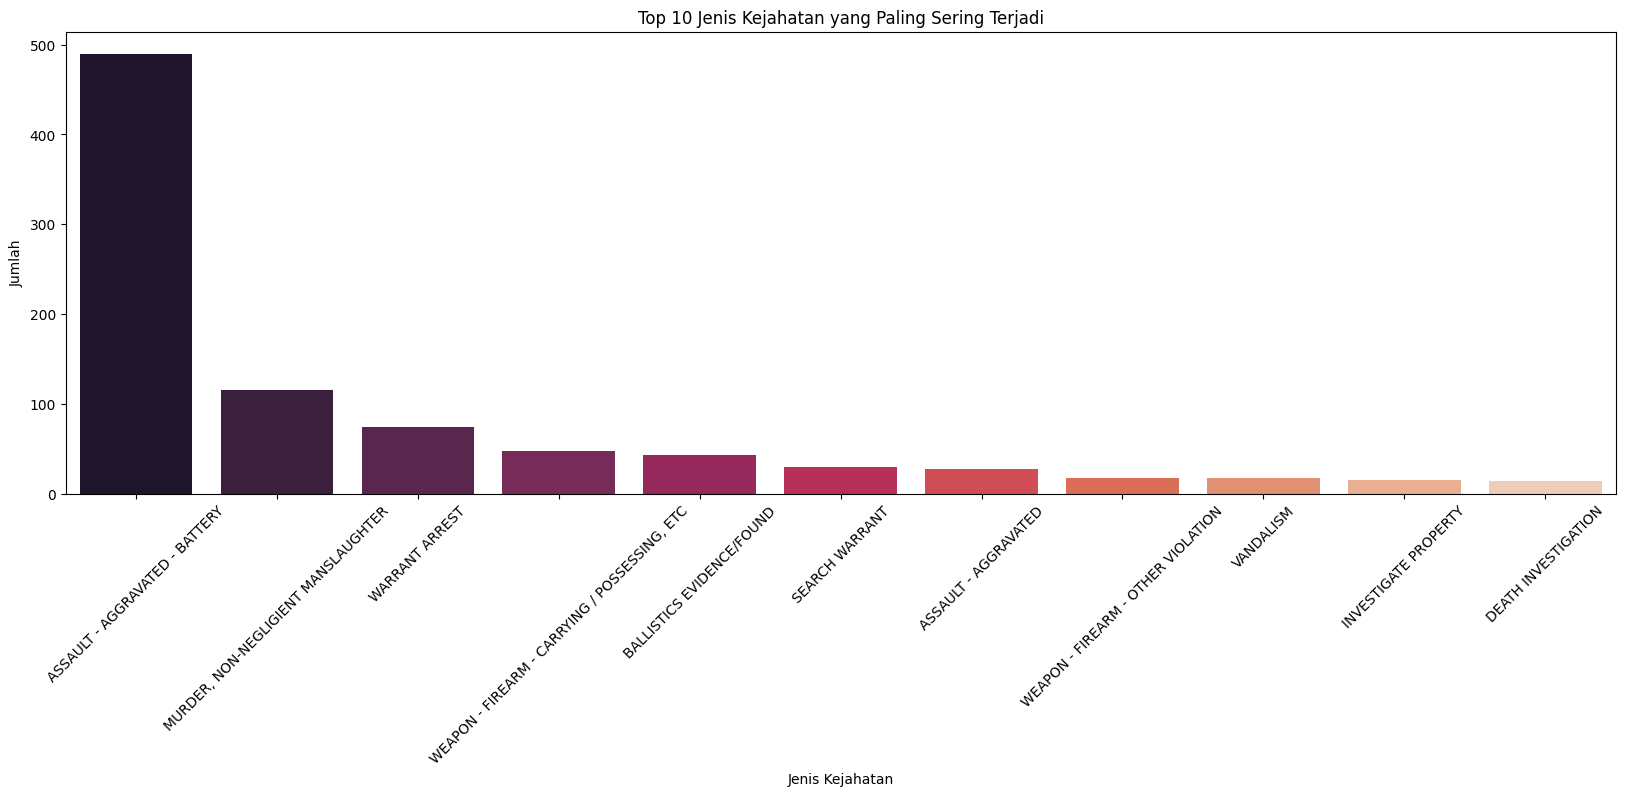

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 jenis kejahatan yang paling sering terjadi
top_crimes = df['OFFENSE_DESCRIPTION'].value_counts().head(11)
plt.figure(figsize=(20,6))
plt.title('Top 10 Jenis Kejahatan yang Paling Sering Terjadi')
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette='rocket')
plt.xticks(rotation=45)
plt.xlabel('Jenis Kejahatan')
plt.ylabel('Jumlah')
plt.show()


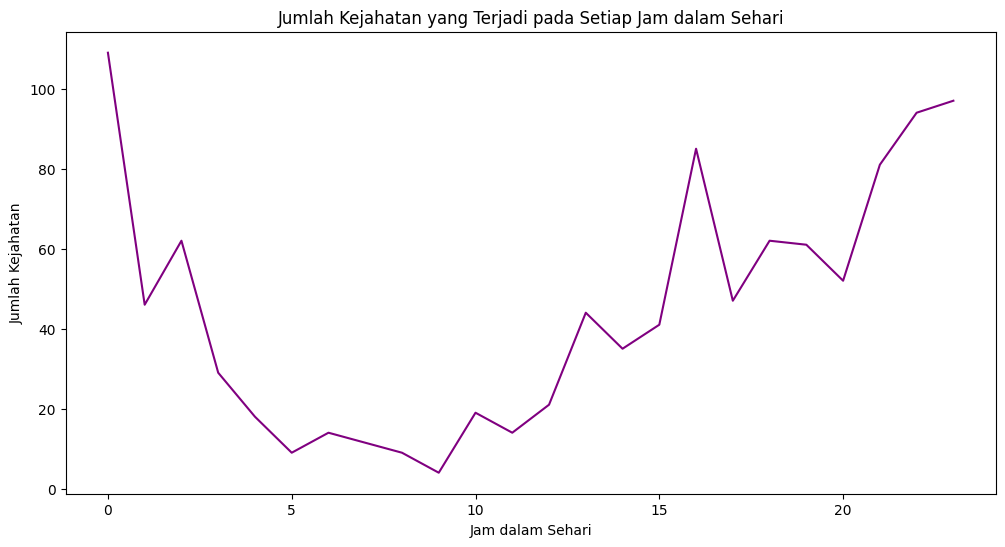

In [78]:
# Kejahatan yang terjadi pada setiap jam dalam sehari
hourly_crimes = df['OCCURRED_ON_DATE'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.title('Jumlah Kejahatan yang Terjadi pada Setiap Jam dalam Sehari')
sns.lineplot(x=hourly_crimes.index, y=hourly_crimes.values, color='purple')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Kejahatan')
plt.show()


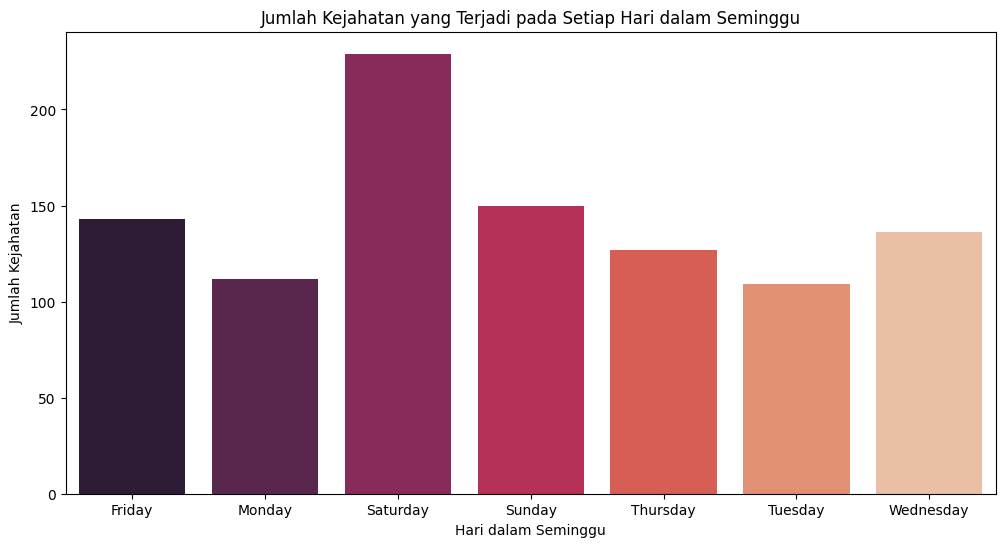

In [89]:
# Kejahatan yang terjadi pada setiap hari dalam seminggu
weekly_crimes = df['DAY_OF_WEEK'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.title('Jumlah Kejahatan yang Terjadi pada Setiap Hari dalam Seminggu')
sns.barplot(x=weekly_crimes.index, y=weekly_crimes.values, palette='rocket')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Kejahatan')
plt.show()


# 6. Kesimpulan dan Rekomendasi

## Kesimpulan

1. Assault - Aggravated - Battery dan Murder, Non-Negigient Manslaughter merupakan jenis kejahatan yang paling sering terjadi di Boston.
2. Kejahatan cenderung terjadi lebih banyak pada malam hari dan puncak kejahatan terjadi pada pukul 21:00-00:00.
3. Kejahatan cenderung terjadi lebih banyak pada hari Sabtu dan Senin.

## Rekomendasi

1. Pihak berwenang harus lebih mewaspadai jenis kejahatan Assault - Aggravated - Battery dan Murder, Non Negligient Manslaughter agar angka kejahatan tersebut dapat menurun
2. Pihak berwenang harus menambah jumlah petugas untuk berjaga pada hari Sabtu dan Senin khususnya pukul 21:00 - 00:00. 